In [1]:
import numpy as np
import pandas as pd
import bokeh.plotting as bp
from bokeh.layouts import gridplot
#bp.output_notebook()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%run ../code/PNLEstimatorWrapper.py
%run ../code/EUtilities.py
EU = EUtilities()

### Se prueba con los datos del mes de enero del 2018, que como se ve a continuación tiene tendencia a la alta

In [4]:
#Se lee la señal anteriormente procesada
data_set = pd.read_csv("../data/TrueFX/EUR-USD/datos_procesados_20s_EURUSD-2018-01.csv", parse_dates=True,
                      infer_datetime_format=True, index_col=0)

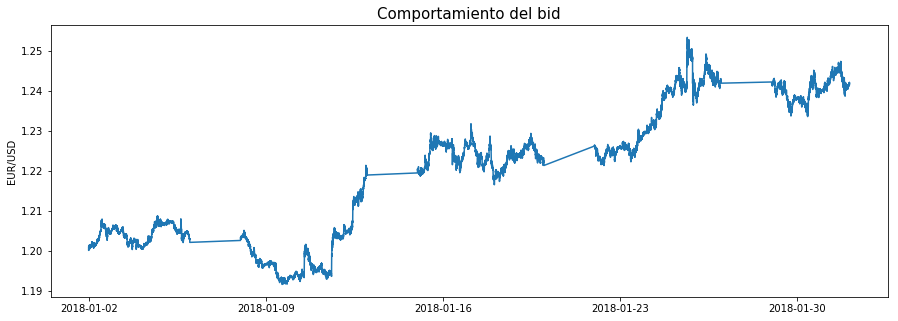

In [7]:
plt.figure(figsize=(15,5))
plt.title('Comportamiento del bid',size=15)
plt.ylabel('EUR/USD')
plt.plot(data_set.index, data_set.bid);

In [8]:
data_set.head()

,bid,ask
2018-01-01 23:58:00,1.20093,1.20115
2018-01-01 23:58:20,1.20082,1.20111
2018-01-01 23:58:40,1.20043,1.20110
2018-01-01 23:59:00,1.20015,1.20110
2018-01-01 23:59:20,1.20028,1.20110


In [9]:
window = 3
X, y_reg, bt = EU.build_dataset(data_set, window, binary_target=True, delete_constant_values=True, PNL=True)

In [11]:
from sklearn.naive_bayes import GaussianNB
    
y = bt
n_bdtrain = 4
n_bdtest = 1
mday = 1
#para indexar el dataframe por las fechas
dates = np.unique(X.index.date)[n_bdtrain:]
est_GNB = PNLEstimatorWrapper(GaussianNB(), PNL_column=['PNL_0','PNL_1'])
result_GNB = EU.step_validation(est_GNB, X, y, EU.v_split(X,n_bdtrain,n_bdtest,mday))
result_GNB, predict_GNB = EU.redim(result_GNB)
print('--------- GaussianNB 20s ----------------')
print('average PNL : ', np.mean(result_GNB[:,0]))
print('average buy: ', np.mean(result_GNB[:,1]))
print('average sell: ', np.mean(result_GNB[:,2]))
print('longest_buy: ', np.max(result_GNB[:,3]))
print('longest_sell: ', np.max(result_GNB[:,4]))
print('%correct_1: ', np.mean(result_GNB[:,5]))
print('%correct_0: ', np.mean(result_GNB[:,6]))
print('% correct total: ', np.mean(result_GNB[:,5]+result_GNB[:,6]))
print('-------------------------------------')
df_GNB = pd.DataFrame(result_GNB, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_GNB)
df_GNB.to_csv('../resultados/TrueFX/EUR-USD/GaussianNB/pnl_20s_GNB_wsize3_2018-01.csv')

--------- GaussianNB 20s ----------------
average PNL :  -0.1396755
average buy:  1348.0
average sell:  2336.2
longest_buy:  3842.0
longest_sell:  4028.0
%correct_1:  0.194821511329
%correct_0:  0.311343669741
% correct total:  0.50616518107
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-05 -0.12714   612.0  3000.0         190.0         2438.0    0.086932   
2018-01-08 -0.13746  3378.0   228.0        3010.0          228.0    0.463949   
2018-01-09 -0.12502  3676.0     0.0        3676.0            0.0    0.496192   
2018-01-10 -0.12976  3518.0   284.0        1986.0          220.0    0.452130   
2018-01-11 -0.13556  2270.0  1530.0        2270.0         1530.0    0.300000   
2018-01-12 -0.16796     0.0  3841.0           0.0         3841.0    0.000000   
2018-01-15 -0.15558  3842.0     0.0        3842.0            0.0    0.484123   
2018-01-16 -0.14143     0.0  3877.0           0.0         3877.0    0.000000   


In [12]:
from sklearn.neighbors import KNeighborsClassifier

est_KNC = PNLEstimatorWrapper(KNeighborsClassifier(n_neighbors=7,n_jobs=2,leaf_size=30
                                                   ,algorithm='kd_tree'), PNL_column=['PNL_0','PNL_1'])
result_KNC = EU.step_validation(est_KNC, X, y, EU.v_split(X,4,1,1))
result_KNC, predict_KNC = EU.redim(result_KNC)
print('-------- KNeighborsClassifier 20s -------')
print('average PNL: ', np.mean(result_KNC[:,0]))
print('average buy: ', np.mean(result_KNC[:,1]))
print('average sell: ', np.mean(result_KNC[:,2]))
print('longest_buy: ', np.max(result_KNC[:,3]))
print('longest_sell: ', np.max(result_KNC[:,4]))
print('%correct_1: ', np.mean(result_KNC[:,5]))
print('%correct_0: ', np.mean(result_KNC[:,6]))
print('% correct total: ', np.mean(result_KNC[:,5]+result_KNC[:,6]))
print('-------------------------------------')
df_KNC = pd.DataFrame(result_KNC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_KNC)
df_KNC.to_csv('../resultados/TrueFX/EUR-USD/KNeighborsClassfier/pnl_20s_KNC_wsize3_2018-01.csv')

-------- KNeighborsClassifier 20s -------
average PNL:  -0.1415885
average buy:  1644.4
average sell:  2039.8
longest_buy:  2263.0
longest_sell:  3433.0
%correct_1:  0.229026866586
%correct_0:  0.276880165796
% correct total:  0.505907032382
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-05 -0.12863  1663.0  1949.0          14.0           18.0    0.221484   
2018-01-08 -0.13204  2940.0   666.0        1661.0           18.0    0.408486   
2018-01-09 -0.12493  2971.0   705.0        2263.0           23.0    0.399347   
2018-01-10 -0.13296  1790.0  2012.0          59.0           57.0    0.229879   
2018-01-11 -0.13184  1736.0  2064.0          17.0           29.0    0.231053   
2018-01-12 -0.16329   543.0  3298.0          27.0         2309.0    0.070555   
2018-01-15 -0.16319   526.0  3316.0          82.0         2276.0    0.066892   
2018-01-16 -0.14089  1872.0  2005.0          35.0           50.0    0.244519   


In [23]:
from sklearn.tree import DecisionTreeClassifier

est_DTC = PNLEstimatorWrapper(DecisionTreeClassifier(), PNL_column=['PNL_0','PNL_1'])
result_DTC = EU.step_validation(est_DTC, X, y, EU.v_split(X,4,1,1))
result_DTC, predict_DTC = EU.redim(result_DTC)
print('------ DecisionTreeClassifier 20s -------')
print('average PNL: ', np.mean(result_DTC[:,0]))
print('average buy: ', np.mean(result_DTC[:,1]))
print('average sell: ', np.mean(result_DTC[:,2]))
print('longest_buy: ', np.max(result_DTC[:,3]))
print('longest_sell: ', np.max(result_DTC[:,4]))
print('%correct_1: ', np.mean(result_DTC[:,5]))
print('%correct_0: ', np.mean(result_DTC[:,6]))
print('% correct total: ', np.mean(result_DTC[:,5]+result_DTC[:,6]))
print('-------------------------------------')
df_DTC = pd.DataFrame(result_DTC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_DTC)
df_DTC.to_csv('../resultados/TrueFX/EUR-USD/DecisionTreeClassifier/pnl_20s_DTC_wsize3_2018-01.csv')

------ DecisionTreeClassifier 20s -------
average PNL:  -0.1443865
average buy:  1783.9
average sell:  1900.3
longest_buy:  2262.0
longest_sell:  3117.0
%correct_1:  0.242943047694
%correct_0:  0.258131411173
% correct total:  0.501074458867
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-05 -0.12823  1703.0  1909.0          17.0           15.0    0.234773   
2018-01-08 -0.13494  2905.0   701.0        1670.0            9.0    0.401276   
2018-01-09 -0.12436  3039.0   637.0        2262.0           12.0    0.410773   
2018-01-10 -0.13323  1816.0  1986.0          32.0           42.0    0.235402   
2018-01-11 -0.13182  1862.0  1938.0           9.0           15.0    0.251579   
2018-01-12 -0.16029   714.0  3127.0          28.0         2317.0    0.096069   
2018-01-15 -0.16793   663.0  3179.0          29.0         2266.0    0.081989   
2018-01-16 -0.14038  1908.0  1969.0          34.0           13.0    0.245809   


In [24]:
from sklearn.ensemble import RandomForestClassifier

est_RFC = PNLEstimatorWrapper(RandomForestClassifier(n_estimators=15, n_jobs=3), PNL_column=['PNL_1','PNL_0'])
result_RFC = EU.step_validation(est_RFC, X, y, EU.v_split(X,4,1,1))
result_RFC, predict_RFC = EU.redim(result_RFC)
print('------- RandomForestClassifier 20s -------')
print('PNL promedio: ', np.mean(result_RFC[:,0]))
print('buy promedio: ', np.mean(result_RFC[:,1]))
print('sell promedio: ', np.mean(result_RFC[:,2]))
print('longest_buy: ', np.max(result_RFC[:,3]))
print('longest_sell: ', np.max(result_RFC[:,4]))
print('%correct_1: ', np.mean(result_RFC[:,5]))
print('%correct_0: ', np.mean(result_RFC[:,6]))
print('% correct total: ', np.mean(result_RFC[:,5]+result_RFC[:,6]))
print('-------------------------------------')
df_RFC = pd.DataFrame(result_RFC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_RFC)
df_RFC.to_csv('../resultados/TrueFX/EUR-USD/RandomForestClassifier/pnl_20s_RFC_wsize3_2018-01.csv')

------- RandomForestClassifier 20s -------
PNL promedio:  -0.140185
buy promedio:  1788.5
sell promedio:  1895.7
longest_buy:  2328.0
longest_sell:  3320.0
%correct_1:  0.245740947874
%correct_0:  0.258557376076
% correct total:  0.50429832395
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-05 -0.13304  1643.0  1969.0          10.0           13.0    0.218715   
2018-01-08 -0.13211  2936.0   670.0        1669.0           15.0    0.408763   
2018-01-09 -0.12349  3001.0   675.0        2262.0           10.0    0.406148   
2018-01-10 -0.13476  1817.0  1985.0          39.0           52.0    0.237507   
2018-01-11 -0.12653  1799.0  2001.0          19.0           16.0    0.239737   
2018-01-12 -0.13681  3197.0   644.0        2328.0           13.0    0.421765   
2018-01-15 -0.16671   619.0  3223.0          74.0         2274.0    0.076262   
2018-01-16 -0.14383  1807.0  2070.0          21.0           19.0    0.236781  

### ahora probaremos con 30s

In [25]:
#Se lee la señal anteriormente procesada
data_set = pd.read_csv("../data/TrueFX/EUR-USD/datos_procesados_30s_EURUSD-2018-01.csv", parse_dates=True,
                      infer_datetime_format=True, index_col=0)
window = 3
X, y_reg, bt = EU.build_dataset(data_set, window, binary_target=True, delete_constant_values=True, PNL=True)

In [26]:
from sklearn.naive_bayes import GaussianNB
    
y = bt
n_bdtrain = 4
n_bdtest = 1
mday = 1
#para indexar el dataframe por las fechas
dates = np.unique(X.index.date)[n_bdtrain:]
est_GNB = PNLEstimatorWrapper(GaussianNB(), PNL_column=['PNL_0','PNL_1'])
result_GNB = EU.step_validation(est_GNB, X, y, EU.v_split(X,n_bdtrain,n_bdtest,mday))
result_GNB, predict_GNB = EU.redim(result_GNB)
print('--------- GaussianNB 30s ----------------')
print('average PNL : ', np.mean(result_GNB[:,0]))
print('average buy: ', np.mean(result_GNB[:,1]))
print('average sell: ', np.mean(result_GNB[:,2]))
print('longest_buy: ', np.max(result_GNB[:,3]))
print('longest_sell: ', np.max(result_GNB[:,4]))
print('%correct_1: ', np.mean(result_GNB[:,5]))
print('%correct_0: ', np.mean(result_GNB[:,6]))
print('% correct total: ', np.mean(result_GNB[:,5]+result_GNB[:,6]))
print('-------------------------------------')
df_GNB = pd.DataFrame(result_GNB, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_GNB)
df_GNB.to_csv('../resultados/TrueFX/EUR-USD/GaussianNB/pnl_30s_GNB_wsize3_2018-01.csv')

--------- GaussianNB 30s ----------------
average PNL :  -0.0952485
average buy:  772.05
average sell:  1753.35
longest_buy:  2642.0
longest_sell:  2744.0
%correct_1:  0.170288977077
%correct_0:  0.335755599564
% correct total:  0.50604457664
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-05 -0.08721   691.0  1841.0         404.0         1223.0    0.138231   
2018-01-08 -0.09590  2394.0   130.0        2110.0          124.0    0.466719   
2018-01-09 -0.08111     0.0  2526.0           0.0         2526.0    0.000000   
2018-01-10 -0.08888  2135.0   482.0        1347.0          423.0    0.388231   
2018-01-11 -0.10030     0.0  2607.0           0.0         2607.0    0.000000   
2018-01-12 -0.11926   937.0  1689.0         468.0         1217.0    0.182026   
2018-01-15 -0.10342  2642.0     0.0        2642.0            0.0    0.482589   
2018-01-16 -0.09765     0.0  2644.0           0.0         2644.0    0.000000   

In [27]:
from sklearn.neighbors import KNeighborsClassifier

est_KNC = PNLEstimatorWrapper(KNeighborsClassifier(n_neighbors=7,n_jobs=2,leaf_size=30
                                                   ,algorithm='kd_tree'), PNL_column=['PNL_0','PNL_1'])
result_KNC = EU.step_validation(est_KNC, X, y, EU.v_split(X,4,1,1))
result_KNC, predict_KNC = EU.redim(result_KNC)
print('-------- KNeighborsClassifier 30s -------')
print('average PNL: ', np.mean(result_KNC[:,0]))
print('average buy: ', np.mean(result_KNC[:,1]))
print('average sell: ', np.mean(result_KNC[:,2]))
print('longest_buy: ', np.max(result_KNC[:,3]))
print('longest_sell: ', np.max(result_KNC[:,4]))
print('%correct_1: ', np.mean(result_KNC[:,5]))
print('%correct_0: ', np.mean(result_KNC[:,6]))
print('% correct total: ', np.mean(result_KNC[:,5]+result_KNC[:,6]))
print('-------------------------------------')
df_KNC = pd.DataFrame(result_KNC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_KNC)
df_KNC.to_csv('../resultados/TrueFX/EUR-USD/KNeighborsClassfier/pnl_30s_KNC_wsize3_2018-01.csv')

-------- KNeighborsClassifier 30s -------
average PNL:  -0.0982875
average buy:  1113.1
average sell:  1412.3
longest_buy:  1552.0
longest_sell:  2335.0
%correct_1:  0.224174092171
%correct_0:  0.277846671954
% correct total:  0.502020764125
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-05 -0.09429  1270.0  1262.0          14.0           20.0    0.240521   
2018-01-08 -0.09323  2033.0   491.0        1163.0           17.0    0.396989   
2018-01-09 -0.08262  2022.0   504.0        1552.0           29.0    0.405384   
2018-01-10 -0.09235  1179.0  1438.0          28.0           44.0    0.213985   
2018-01-11 -0.08643  1240.0  1367.0          16.0           13.0    0.235136   
2018-01-12 -0.11856   342.0  2284.0          12.0         1576.0    0.065880   
2018-01-15 -0.11363   232.0  2410.0          54.0         1560.0    0.042771   
2018-01-16 -0.10599  1096.0  1548.0          17.0           26.0    0.201589   


In [28]:
from sklearn.tree import DecisionTreeClassifier

est_DTC = PNLEstimatorWrapper(DecisionTreeClassifier(), PNL_column=['PNL_0','PNL_1'])
result_DTC = EU.step_validation(est_DTC, X, y, EU.v_split(X,4,1,1))
result_DTC, predict_DTC = EU.redim(result_DTC)
print('------ DecisionTreeClassifier 30s -------')
print('average PNL: ', np.mean(result_DTC[:,0]))
print('average buy: ', np.mean(result_DTC[:,1]))
print('average sell: ', np.mean(result_DTC[:,2]))
print('longest_buy: ', np.max(result_DTC[:,3]))
print('longest_sell: ', np.max(result_DTC[:,4]))
print('%correct_1: ', np.mean(result_DTC[:,5]))
print('%correct_0: ', np.mean(result_DTC[:,6]))
print('% correct total: ', np.mean(result_DTC[:,5]+result_DTC[:,6]))
print('-------------------------------------')
df_DTC = pd.DataFrame(result_DTC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_DTC)
df_DTC.to_csv('../resultados/TrueFX/EUR-USD/DecisionTreeClassifier/pnl_30s_DTC_wsize3_2018-01.csv')

------ DecisionTreeClassifier 30s -------
average PNL:  -0.098932
average buy:  1297.0
average sell:  1228.4
longest_buy:  1552.0
longest_sell:  2115.0
%correct_1:  0.255209708429
%correct_0:  0.245231323811
% correct total:  0.500441032239
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-05 -0.09491  1270.0  1262.0          10.0           10.0    0.242891   
2018-01-08 -0.09057  2018.0   506.0        1163.0            8.0    0.394612   
2018-01-09 -0.08678  2015.0   511.0        1552.0           20.0    0.396675   
2018-01-10 -0.09741  1327.0  1290.0          25.0           47.0    0.243791   
2018-01-11 -0.08479  1272.0  1335.0          11.0           11.0    0.247794   
2018-01-12 -0.12028   374.0  2252.0          19.0         1576.0    0.070069   
2018-01-15 -0.10989  2071.0   571.0        1482.0           50.0    0.376987   
2018-01-16 -0.09830  1167.0  1477.0          20.0           23.0    0.219365   
2

In [29]:
from sklearn.ensemble import RandomForestClassifier

est_RFC = PNLEstimatorWrapper(RandomForestClassifier(n_estimators=15, n_jobs=3), PNL_column=['PNL_1','PNL_0'])
result_RFC = EU.step_validation(est_RFC, X, y, EU.v_split(X,4,1,1))
result_RFC, predict_RFC = EU.redim(result_RFC)
print('------- RandomForestClassifier 30s -------')
print('PNL promedio: ', np.mean(result_RFC[:,0]))
print('buy promedio: ', np.mean(result_RFC[:,1]))
print('sell promedio: ', np.mean(result_RFC[:,2]))
print('longest_buy: ', np.max(result_RFC[:,3]))
print('longest_sell: ', np.max(result_RFC[:,4]))
print('%correct_1: ', np.mean(result_RFC[:,5]))
print('%correct_0: ', np.mean(result_RFC[:,6]))
print('% correct total: ', np.mean(result_RFC[:,5]+result_RFC[:,6]))
print('-------------------------------------')
df_RFC = pd.DataFrame(result_RFC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_DTC)
df_RFC.to_csv('../resultados/TrueFX/EUR-USD/RandomForestClassifier/pnl_30s_RFC_wsize3_2018-01.csv')

------- RandomForestClassifier 30s -------
PNL promedio:  -0.1012595
buy promedio:  1119.75
sell promedio:  1405.65
longest_buy:  1552.0
longest_sell:  2338.0
%correct_1:  0.22251865734
%correct_0:  0.276180082677
% correct total:  0.498698740018
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-05 -0.09491  1270.0  1262.0          10.0           10.0    0.242891   
2018-01-08 -0.09057  2018.0   506.0        1163.0            8.0    0.394612   
2018-01-09 -0.08678  2015.0   511.0        1552.0           20.0    0.396675   
2018-01-10 -0.09741  1327.0  1290.0          25.0           47.0    0.243791   
2018-01-11 -0.08479  1272.0  1335.0          11.0           11.0    0.247794   
2018-01-12 -0.12028   374.0  2252.0          19.0         1576.0    0.070069   
2018-01-15 -0.10989  2071.0   571.0        1482.0           50.0    0.376987   
2018-01-16 -0.09830  1167.0  1477.0          20.0           23.0    0.21936

### ahora con intervalos de 40s

In [30]:
#Se lee la señal anteriormente procesada
data_set = pd.read_csv("../data/TrueFX/EUR-USD/datos_procesados_40s_EURUSD-2018-01.csv", parse_dates=True,
                      infer_datetime_format=True, index_col=0)
window = 3
X, y_reg, bt = EU.build_dataset(data_set, window, binary_target=True, delete_constant_values=True, PNL=True)

In [31]:
from sklearn.naive_bayes import GaussianNB
    
y = bt
n_bdtrain = 4
n_bdtest = 1
mday = 1
#para indexar el dataframe por las fechas
dates = np.unique(X.index.date)[n_bdtrain:]
est_GNB = PNLEstimatorWrapper(GaussianNB(), PNL_column=['PNL_0','PNL_1'])
result_GNB = EU.step_validation(est_GNB, X, y, EU.v_split(X,n_bdtrain,n_bdtest,mday))
result_GNB, predict_GNB = EU.redim(result_GNB)
print('--------- GaussianNB 40s ----------------')
print('average PNL : ', np.mean(result_GNB[:,0]))
print('average buy: ', np.mean(result_GNB[:,1]))
print('average sell: ', np.mean(result_GNB[:,2]))
print('longest_buy: ', np.max(result_GNB[:,3]))
print('longest_sell: ', np.max(result_GNB[:,4]))
print('%correct_1: ', np.mean(result_GNB[:,5]))
print('%correct_0: ', np.mean(result_GNB[:,6]))
print('% correct total: ', np.mean(result_GNB[:,5]+result_GNB[:,6]))
print('-------------------------------------')
df_GNB = pd.DataFrame(result_GNB, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_GNB)
df_GNB.to_csv('../resultados/TrueFX/EUR-USD/GaussianNB/pnl_40s_GNB_wsize3_2018-01.csv')

--------- GaussianNB 40s ----------------
average PNL :  -0.0719035
average buy:  827.35
average sell:  1091.95
longest_buy:  2017.0
longest_sell:  2065.0
%correct_1:  0.234535391516
%correct_0:  0.273192256673
% correct total:  0.507727648189
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-05 -0.06508   444.0  1482.0         303.0          939.0    0.115265   
2018-01-08 -0.07527  1837.0   105.0        1617.0           97.0    0.480433   
2018-01-09 -0.06740  1933.0     0.0        1933.0            0.0    0.487325   
2018-01-10 -0.07293  1729.0   252.0        1253.0          130.0    0.418476   
2018-01-11 -0.07949     0.0  2001.0           0.0         2001.0    0.000000   
2018-01-12 -0.06607  1846.0   151.0        1846.0          151.0    0.487231   
2018-01-15 -0.07911  2017.0     0.0        2017.0            0.0    0.486862   
2018-01-16 -0.07435     0.0  2000.0           0.0         2000.0    0.000000  

In [32]:
from sklearn.neighbors import KNeighborsClassifier

est_KNC = PNLEstimatorWrapper(KNeighborsClassifier(n_neighbors=7,n_jobs=2,leaf_size=30
                                                   ,algorithm='kd_tree'), PNL_column=['PNL_0','PNL_1'])
result_KNC = EU.step_validation(est_KNC, X, y, EU.v_split(X,4,1,1))
result_KNC, predict_KNC = EU.redim(result_KNC)
print('-------- KNeighborsClassifier 40s -------')
print('average PNL: ', np.mean(result_KNC[:,0]))
print('average buy: ', np.mean(result_KNC[:,1]))
print('average sell: ', np.mean(result_KNC[:,2]))
print('longest_buy: ', np.max(result_KNC[:,3]))
print('longest_sell: ', np.max(result_KNC[:,4]))
print('%correct_1: ', np.mean(result_KNC[:,5]))
print('%correct_0: ', np.mean(result_KNC[:,6]))
print('% correct total: ', np.mean(result_KNC[:,5]+result_KNC[:,6]))
print('-------------------------------------')
df_KNC = pd.DataFrame(result_KNC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_KNC)
df_KNC.to_csv('../resultados/TrueFX/EUR-USD/KNeighborsClassfier/pnl_40s_KNC_wsize3_2018-01.csv')

-------- KNeighborsClassifier 40s -------
average PNL:  -0.0772805
average buy:  853.05
average sell:  1066.25
longest_buy:  1189.0
longest_sell:  1766.0
%correct_1:  0.229109153945
%correct_0:  0.272392055425
% correct total:  0.50150120937
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-05 -0.07080   906.0  1020.0          14.0           14.0    0.235722   
2018-01-08 -0.07074  1576.0   366.0         902.0           11.0    0.413491   
2018-01-09 -0.06630  1597.0   336.0        1189.0           10.0    0.404553   
2018-01-10 -0.07521   890.0  1091.0          19.0           39.0    0.218072   
2018-01-11 -0.07684   906.0  1095.0          10.0           13.0    0.212894   
2018-01-12 -0.09177   272.0  1725.0           7.0         1192.0    0.071607   
2018-01-15 -0.08770   237.0  1780.0          50.0         1179.0    0.058007   
2018-01-16 -0.07299   866.0  1134.0          12.0           22.0    0.211500   


In [33]:
from sklearn.tree import DecisionTreeClassifier

est_DTC = PNLEstimatorWrapper(DecisionTreeClassifier(), PNL_column=['PNL_0','PNL_1'])
result_DTC = EU.step_validation(est_DTC, X, y, EU.v_split(X,4,1,1))
result_DTC, predict_DTC = EU.redim(result_DTC)
print('------ DecisionTreeClassifier 40s -------')
print('average PNL: ', np.mean(result_DTC[:,0]))
print('average buy: ', np.mean(result_DTC[:,1]))
print('average sell: ', np.mean(result_DTC[:,2]))
print('longest_buy: ', np.max(result_DTC[:,3]))
print('longest_sell: ', np.max(result_DTC[:,4]))
print('%correct_1: ', np.mean(result_DTC[:,5]))
print('%correct_0: ', np.mean(result_DTC[:,6]))
print('% correct total: ', np.mean(result_DTC[:,5]+result_DTC[:,6]))
print('-------------------------------------')
df_DTC = pd.DataFrame(result_DTC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_DTC)
df_DTC.to_csv('../resultados/TrueFX/EUR-USD/DecisionTreeClassifier/pnl_40s_DTC_wsize3_2018-01.csv')

------ DecisionTreeClassifier 40s -------
average PNL:  -0.077588
average buy:  864.0
average sell:  1055.3
longest_buy:  1189.0
longest_sell:  1769.0
%correct_1:  0.229823943992
%correct_0:  0.26837008474
% correct total:  0.498194028732
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-05 -0.06030   896.0  1030.0          10.0           12.0    0.225337   
2018-01-08 -0.06485   418.0  1524.0           9.0          885.0    0.113285   
2018-01-09 -0.06652  1618.0   315.0        1189.0            7.0    0.411278   
2018-01-10 -0.07461   983.0   998.0          18.0           35.0    0.240787   
2018-01-11 -0.07099   959.0  1042.0          12.0           13.0    0.239880   
2018-01-12 -0.09302   307.0  1690.0          11.0         1191.0    0.080621   
2018-01-15 -0.08250  1533.0   484.0        1168.0           58.0    0.368865   
2018-01-16 -0.08876   965.0  1035.0          18.0           16.0    0.234000   
201

In [34]:
from sklearn.ensemble import RandomForestClassifier

est_RFC = PNLEstimatorWrapper(RandomForestClassifier(n_estimators=15, n_jobs=3), PNL_column=['PNL_1','PNL_0'])
result_RFC = EU.step_validation(est_RFC, X, y, EU.v_split(X,4,1,1))
result_RFC, predict_RFC = EU.redim(result_RFC)
print('------- RandomForestClassifier 40s -------')
print('PNL promedio: ', np.mean(result_RFC[:,0]))
print('buy promedio: ', np.mean(result_RFC[:,1]))
print('sell promedio: ', np.mean(result_RFC[:,2]))
print('longest_buy: ', np.max(result_RFC[:,3]))
print('longest_sell: ', np.max(result_RFC[:,4]))
print('%correct_1: ', np.mean(result_RFC[:,5]))
print('%correct_0: ', np.mean(result_RFC[:,6]))
print('% correct total: ', np.mean(result_RFC[:,5]+result_RFC[:,6]))
print('-------------------------------------')
df_RFC = pd.DataFrame(result_RFC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_RFC)
df_RFC.to_csv('../resultados/TrueFX/EUR-USD/RandomForestClassifier/pnl_40s_RFC_wsize3_2018-01.csv')

------- RandomForestClassifier 40s -------
PNL promedio:  -0.0761385
buy promedio:  858.0
sell promedio:  1061.3
longest_buy:  1189.0
longest_sell:  1768.0
%correct_1:  0.230874129891
%correct_0:  0.27217880002
% correct total:  0.50305292991
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-05 -0.06879   967.0   959.0          11.0           11.0    0.248702   
2018-01-08 -0.07027  1577.0   365.0         887.0           12.0    0.416066   
2018-01-09 -0.06696  1628.0   305.0        1189.0            7.0    0.413864   
2018-01-10 -0.07196   932.0  1049.0          18.0           37.0    0.227158   
2018-01-11 -0.06432   916.0  1085.0          11.0           12.0    0.233883   
2018-01-12 -0.09635   290.0  1707.0           9.0         1191.0    0.071107   
2018-01-15 -0.08978   211.0  1806.0          35.0         1186.0    0.054536   
2018-01-16 -0.08568   900.0  1100.0          23.0           11.0    0.226500   

### se probará con muestreo de 50s

In [35]:
#Se lee la señal anteriormente procesada
data_set = pd.read_csv("../data/TrueFX/EUR-USD/datos_procesados_50s_EURUSD-2018-01.csv", parse_dates=True,
                      infer_datetime_format=True, index_col=0)
window = 3
X, y_reg, bt = EU.build_dataset(data_set, window, binary_target=True, delete_constant_values=True, PNL=True)

In [36]:
from sklearn.naive_bayes import GaussianNB
    
y = bt
n_bdtrain = 4
n_bdtest = 1
mday = 1
#para indexar el dataframe por las fechas
dates = np.unique(X.index.date)[n_bdtrain:]
est_GNB = PNLEstimatorWrapper(GaussianNB(), PNL_column=['PNL_0','PNL_1'])
result_GNB = EU.step_validation(est_GNB, X, y, EU.v_split(X,n_bdtrain,n_bdtest,mday))
result_GNB, predict_GNB = EU.redim(result_GNB)
print('--------- GaussianNB 50s ----------------')
print('average PNL : ', np.mean(result_GNB[:,0]))
print('average buy: ', np.mean(result_GNB[:,1]))
print('average sell: ', np.mean(result_GNB[:,2]))
print('longest_buy: ', np.max(result_GNB[:,3]))
print('longest_sell: ', np.max(result_GNB[:,4]))
print('%correct_1: ', np.mean(result_GNB[:,5]))
print('%correct_0: ', np.mean(result_GNB[:,6]))
print('% correct total: ', np.mean(result_GNB[:,5]+result_GNB[:,6]))
print('-------------------------------------')
df_GNB = pd.DataFrame(result_GNB, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_GNB)
df_GNB.to_csv('../resultados/TrueFX/EUR-USD/GaussianNB/pnl_50s_GNB_wsize3_2018-01.csv')

--------- GaussianNB 50s ----------------
average PNL :  -0.0596763157895
average buy:  443.157894737
average sell:  1109.73684211
longest_buy:  1630.0
longest_sell:  1662.0
%correct_1:  0.163145818185
%correct_0:  0.340182695261
% correct total:  0.503328513446
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-08 -0.06278  1489.0    84.0        1302.0           80.0    0.458996   
2018-01-09 -0.05393   479.0  1114.0         255.0          981.0    0.146893   
2018-01-10 -0.05997     0.0  1613.0           0.0         1613.0    0.000000   
2018-01-11 -0.06663     0.0  1614.0           0.0         1614.0    0.000000   
2018-01-12 -0.08222     0.0  1612.0           0.0         1612.0    0.000000   
2018-01-15 -0.06128  1630.0     0.0        1630.0            0.0    0.484049   
2018-01-16 -0.05921     0.0  1606.0           0.0         1606.0    0.000000   
2018-01-17 -0.05920     0.0  1653.0           0.0         1

In [37]:
from sklearn.neighbors import KNeighborsClassifier

est_KNC = PNLEstimatorWrapper(KNeighborsClassifier(n_neighbors=7,n_jobs=2,leaf_size=30
                                                   ,algorithm='kd_tree'), PNL_column=['PNL_0','PNL_1'])
result_KNC = EU.step_validation(est_KNC, X, y, EU.v_split(X,4,1,1))
result_KNC, predict_KNC = EU.redim(result_KNC)
print('-------- KNeighborsClassifier 50s -------')
print('average PNL: ', np.mean(result_KNC[:,0]))
print('average buy: ', np.mean(result_KNC[:,1]))
print('average sell: ', np.mean(result_KNC[:,2]))
print('longest_buy: ', np.max(result_KNC[:,3]))
print('longest_sell: ', np.max(result_KNC[:,4]))
print('%correct_1: ', np.mean(result_KNC[:,5]))
print('%correct_0: ', np.mean(result_KNC[:,6]))
print('% correct total: ', np.mean(result_KNC[:,5]+result_KNC[:,6]))
print('-------------------------------------')
df_KNC = pd.DataFrame(result_KNC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_KNC)
df_KNC.to_csv('../resultados/TrueFX/EUR-USD/KNeighborsClassfier/pnl_50s_KNC_wsize3_2018-01.csv')

-------- KNeighborsClassifier 50s -------
average PNL:  -0.0637194736842
average buy:  674.210526316
average sell:  878.684210526
longest_buy:  959.0
longest_sell:  1437.0
%correct_1:  0.219639063916
%correct_0:  0.275145287955
% correct total:  0.494784351871
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-08 -0.06040  1253.0   320.0         715.0           12.0    0.384615   
2018-01-09 -0.05392  1291.0   302.0         959.0            8.0    0.399247   
2018-01-10 -0.06380   661.0   952.0          14.0           35.0    0.198388   
2018-01-11 -0.05946   713.0   901.0          10.0           12.0    0.228625   
2018-01-12 -0.07900   184.0  1428.0           7.0         1028.0    0.058313   
2018-01-15 -0.06846    95.0  1535.0          32.0         1179.0    0.031288   
2018-01-16 -0.06427   819.0   787.0          37.0           15.0    0.242839   
2018-01-17 -0.06886   739.0   914.0          12.0           5

In [38]:
from sklearn.tree import DecisionTreeClassifier

est_DTC = PNLEstimatorWrapper(DecisionTreeClassifier(), PNL_column=['PNL_0','PNL_1'])
result_DTC = EU.step_validation(est_DTC, X, y, EU.v_split(X,4,1,1))
result_DTC, predict_DTC = EU.redim(result_DTC)
print('------ DecisionTreeClassifier 50s -------')
print('average PNL: ', np.mean(result_DTC[:,0]))
print('average buy: ', np.mean(result_DTC[:,1]))
print('average sell: ', np.mean(result_DTC[:,2]))
print('longest_buy: ', np.max(result_DTC[:,3]))
print('longest_sell: ', np.max(result_DTC[:,4]))
print('%correct_1: ', np.mean(result_DTC[:,5]))
print('%correct_0: ', np.mean(result_DTC[:,6]))
print('% correct total: ', np.mean(result_DTC[:,5]+result_DTC[:,6]))
print('-------------------------------------')
df_DTC = pd.DataFrame(result_DTC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_DTC)
df_DTC.to_csv('../resultados/TrueFX/EUR-USD/DecisionTreeClassifier/pnl_50s_DTC_wsize3_2018-01.csv')

------ DecisionTreeClassifier 50s -------
average PNL:  -0.0628089473684
average buy:  692.315789474
average sell:  860.578947368
longest_buy:  961.0
longest_sell:  1436.0
%correct_1:  0.225566455408
%correct_0:  0.27382812375
% correct total:  0.499394579158
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-08 -0.06107  1221.0   352.0         705.0           11.0    0.376351   
2018-01-09 -0.05361  1316.0   277.0         961.0            8.0    0.404896   
2018-01-10 -0.05907   721.0   892.0          15.0           29.0    0.223187   
2018-01-11 -0.06052   746.0   868.0          11.0            9.0    0.231103   
2018-01-12 -0.08061   268.0  1344.0          14.0          951.0    0.080645   
2018-01-15 -0.07158   158.0  1472.0          32.0          962.0    0.047239   
2018-01-16 -0.05689   844.0   762.0          14.0           20.0    0.262142   
2018-01-17 -0.06450   744.0   909.0           8.0           33

In [39]:
from sklearn.ensemble import RandomForestClassifier

est_RFC = PNLEstimatorWrapper(RandomForestClassifier(n_estimators=15, n_jobs=3), PNL_column=['PNL_1','PNL_0'])
result_RFC = EU.step_validation(est_RFC, X, y, EU.v_split(X,4,1,1))
result_RFC, predict_RFC = EU.redim(result_RFC)
print('------- RandomForestClassifier 50s -------')
print('PNL promedio: ', np.mean(result_RFC[:,0]))
print('buy promedio: ', np.mean(result_RFC[:,1]))
print('sell promedio: ', np.mean(result_RFC[:,2]))
print('longest_buy: ', np.max(result_RFC[:,3]))
print('longest_sell: ', np.max(result_RFC[:,4]))
print('%correct_1: ', np.mean(result_RFC[:,5]))
print('%correct_0: ', np.mean(result_RFC[:,6]))
print('% correct total: ', np.mean(result_RFC[:,5]+result_RFC[:,6]))
print('-------------------------------------')
df_RFC = pd.DataFrame(result_RFC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_RFC)
df_RFC.to_csv('../resultados/TrueFX/EUR-USD/RandomForestClassifier/pnl_50s_RFC_wsize3_2018-01.csv')

------- RandomForestClassifier 50s -------
PNL promedio:  -0.0612231578947
buy promedio:  634.789473684
sell promedio:  918.105263158
longest_buy:  961.0
longest_sell:  1436.0
%correct_1:  0.209991863408
%correct_0:  0.292636377344
% correct total:  0.502628240752
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-08 -0.05264   365.0  1208.0          12.0          703.0    0.111252   
2018-01-09 -0.05590  1301.0   292.0         961.0           10.0    0.398619   
2018-01-10 -0.05290   602.0  1011.0          15.0           39.0    0.192808   
2018-01-11 -0.06003   733.0   881.0           9.0           19.0    0.231103   
2018-01-12 -0.07817   234.0  1378.0          11.0          962.0    0.074442   
2018-01-15 -0.06891   112.0  1518.0          31.0          963.0    0.036810   
2018-01-16 -0.06284   879.0   727.0          22.0           12.0    0.267746   
2018-01-17 -0.05923   780.0   873.0          42.0        

### se prueba con resample = 1 minuto

In [3]:
#Se lee la señal anteriormente procesada
data_set = pd.read_csv("../data/TrueFX/EUR-USD/datos_procesados_1T_EURUSD-2018-01.csv", parse_dates=True,
                      infer_datetime_format=True, index_col=0)
window = 3
X, y_reg, bt = EU.build_dataset(data_set, window, binary_target=True, delete_constant_values=True, PNL=True)

In [4]:
from sklearn.naive_bayes import GaussianNB
    
y = bt
n_bdtrain = 4
n_bdtest = 1
mday = 1
#para indexar el dataframe por las fechas
dates = np.unique(X.index.date)[n_bdtrain:]
est_GNB = PNLEstimatorWrapper(GaussianNB(), PNL_column=['PNL_0','PNL_1'])
result_GNB = EU.step_validation(est_GNB, X, y, EU.v_split(X,n_bdtrain,n_bdtest,mday))
result_GNB, predict_GNB = EU.redim(result_GNB)
print('--------- GaussianNB 1m ----------------')
print('average PNL : ', np.mean(result_GNB[:,0]))
print('average buy: ', np.mean(result_GNB[:,1]))
print('average sell: ', np.mean(result_GNB[:,2]))
print('longest_buy: ', np.max(result_GNB[:,3]))
print('longest_sell: ', np.max(result_GNB[:,4]))
print('%correct_1: ', np.mean(result_GNB[:,5]))
print('%correct_0: ', np.mean(result_GNB[:,6]))
print('% correct total: ', np.mean(result_GNB[:,5]+result_GNB[:,6]))
print('-------------------------------------')
df_GNB = pd.DataFrame(result_GNB, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_GNB)
df_GNB.to_csv('../resultados/TrueFX/EUR-USD/GaussianNB/pnl_1m_GNB_wsize3_2018-01.csv')

--------- GaussianNB 1m ----------------
average PNL :  -0.0501810526316
average buy:  636.315789474
average sell:  665.947368421
longest_buy:  1393.0
longest_sell:  1390.0
%correct_1:  0.249541869795
%correct_0:  0.252453737689
% correct total:  0.501995607484
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-08 -0.05428  1237.0    91.0        1096.0           91.0    0.466867   
2018-01-09 -0.05088  1299.0    24.0         852.0            9.0    0.485261   
2018-01-10 -0.04508  1334.0    35.0         768.0           13.0    0.483565   
2018-01-11 -0.04975   827.0   546.0         827.0          546.0    0.313911   
2018-01-12 -0.07374    54.0  1303.0          54.0         1303.0    0.019160   
2018-01-15 -0.05154  1375.0     0.0        1375.0            0.0    0.497455   
2018-01-16 -0.05129     0.0  1357.0           0.0         1357.0    0.000000   
2018-01-17 -0.04851     1.0  1382.0           1.0         13

In [5]:
from sklearn.neighbors import KNeighborsClassifier

est_KNC = PNLEstimatorWrapper(KNeighborsClassifier(n_neighbors=7,n_jobs=2,leaf_size=30
                                                   ,algorithm='kd_tree'), PNL_column=['PNL_0','PNL_1'])
result_KNC = EU.step_validation(est_KNC, X, y, EU.v_split(X,4,1,1))
result_KNC, predict_KNC = EU.redim(result_KNC)
print('-------- KNeighborsClassifier 1m -------')
print('average PNL: ', np.mean(result_KNC[:,0]))
print('average buy: ', np.mean(result_KNC[:,1]))
print('average sell: ', np.mean(result_KNC[:,2]))
print('longest_buy: ', np.max(result_KNC[:,3]))
print('longest_sell: ', np.max(result_KNC[:,4]))
print('%correct_1: ', np.mean(result_KNC[:,5]))
print('%correct_0: ', np.mean(result_KNC[:,6]))
print('% correct total: ', np.mean(result_KNC[:,5]+result_KNC[:,6]))
print('-------------------------------------')
df_KNC = pd.DataFrame(result_KNC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_KNC)
df_KNC.to_csv('../resultados/TrueFX/EUR-USD/KNeighborsClassfier/pnl_1m_KNC_wsize3_2018-01.csv')

-------- KNeighborsClassifier 1m -------
average PNL:  -0.054782631579
average buy:  544.368421053
average sell:  757.894736842
longest_buy:  611.0
longest_sell:  1186.0
%correct_1:  0.211588594942
%correct_0:  0.284023012271
% correct total:  0.495611607213
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-08 -0.05111  1086.0   242.0         611.0            8.0    0.411898   
2018-01-09 -0.04297   202.0  1121.0          10.0          795.0    0.077853   
2018-01-10 -0.04568   595.0   774.0          17.0           85.0    0.220599   
2018-01-11 -0.05135   641.0   732.0          12.0           12.0    0.235980   
2018-01-12 -0.07015   224.0  1133.0          13.0          851.0    0.083272   
2018-01-15 -0.05993   137.0  1238.0          27.0          811.0    0.050182   
2018-01-16 -0.04905   701.0   656.0          23.0           17.0    0.258659   
2018-01-17 -0.05877   661.0   722.0          28.0           87.

In [6]:
from sklearn.tree import DecisionTreeClassifier

est_DTC = PNLEstimatorWrapper(DecisionTreeClassifier(), PNL_column=['PNL_0','PNL_1'])
result_DTC = EU.step_validation(est_DTC, X, y, EU.v_split(X,4,1,1))
result_DTC, predict_DTC = EU.redim(result_DTC)
print('------ DecisionTreeClassifier 1m -------')
print('average PNL: ', np.mean(result_DTC[:,0]))
print('average buy: ', np.mean(result_DTC[:,1]))
print('average sell: ', np.mean(result_DTC[:,2]))
print('longest_buy: ', np.max(result_DTC[:,3]))
print('longest_sell: ', np.max(result_DTC[:,4]))
print('%correct_1: ', np.mean(result_DTC[:,5]))
print('%correct_0: ', np.mean(result_DTC[:,6]))
print('% correct total: ', np.mean(result_DTC[:,5]+result_DTC[:,6]))
print('-------------------------------------')
df_DTC = pd.DataFrame(result_DTC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_DTC)
df_DTC.to_csv('../resultados/TrueFX/EUR-USD/DecisionTreeClassifier/pnl_1m_DTC_wsize3_2018-01.csv')

------ DecisionTreeClassifier 1m -------
average PNL:  -0.0506831578947
average buy:  644.157894737
average sell:  658.105263158
longest_buy:  806.0
longest_sell:  1188.0
%correct_1:  0.250982679962
%correct_0:  0.248802358194
% correct total:  0.499785038155
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-08 -0.04697   278.0  1050.0           9.0          598.0    0.100151   
2018-01-09 -0.04799  1059.0   264.0         797.0           12.0    0.396070   
2018-01-10 -0.05443   621.0   748.0          12.0           24.0    0.222790   
2018-01-11 -0.04769   663.0   710.0           9.0           11.0    0.238893   
2018-01-12 -0.04327  1105.0   252.0         793.0           21.0    0.428150   
2018-01-15 -0.05120  1068.0   307.0         806.0           48.0    0.388364   
2018-01-16 -0.05754   715.0   642.0          14.0           12.0    0.260870   
2018-01-17 -0.05853   709.0   674.0          39.0           14

In [7]:
from sklearn.ensemble import RandomForestClassifier

est_RFC = PNLEstimatorWrapper(RandomForestClassifier(n_estimators=15, n_jobs=3), PNL_column=['PNL_1','PNL_0'])
result_RFC = EU.step_validation(est_RFC, X, y, EU.v_split(X,4,1,1))
result_RFC, predict_RFC = EU.redim(result_RFC)
print('------- RandomForestClassifier 1m -------')
print('PNL promedio: ', np.mean(result_RFC[:,0]))
print('buy promedio: ', np.mean(result_RFC[:,1]))
print('sell promedio: ', np.mean(result_RFC[:,2]))
print('longest_buy: ', np.max(result_RFC[:,3]))
print('longest_sell: ', np.max(result_RFC[:,4]))
print('%correct_1: ', np.mean(result_RFC[:,5]))
print('%correct_0: ', np.mean(result_RFC[:,6]))
print('% correct total: ', np.mean(result_RFC[:,5]+result_RFC[:,6]))
print('-------------------------------------')
df_RFC = pd.DataFrame(result_RFC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_RFC)
df_RFC.to_csv('../resultados/TrueFX/EUR-USD/RandomForestClassifier/pnl_1m_RFC_wsize3_2018-01.csv')

------- RandomForestClassifier 1m -------
PNL promedio:  -0.05133
buy promedio:  580.631578947
sell promedio:  721.631578947
longest_buy:  797.0
longest_sell:  1188.0
%correct_1:  0.229395112762
%correct_0:  0.273834387295
% correct total:  0.503229500056
-------------------------------------
                PNL    buys   sells  longest_buys  longest_sells  %correct_1  \
2018-01-08 -0.04705   301.0  1027.0          13.0          598.0    0.113705   
2018-01-09 -0.04821  1041.0   282.0         797.0           11.0    0.390023   
2018-01-10 -0.04915   571.0   798.0          12.0           55.0    0.206720   
2018-01-11 -0.04857   663.0   710.0          10.0            9.0    0.243263   
2018-01-12 -0.04674  1086.0   271.0         787.0           29.0    0.413412   
2018-01-15 -0.05571   111.0  1264.0          27.0          813.0    0.046545   
2018-01-16 -0.05951   674.0   683.0          12.0           12.0    0.245394   
2018-01-17 -0.05382   635.0   748.0          26.0           54.0  

### ahora se prueba con las muestras de 1 minuto y 30s

In [8]:
#Se lee la señal anteriormente procesada
data_set = pd.read_csv("../data/TrueFX/EUR-USD/datos_procesados_1T30s_EURUSD-2018-01.csv", parse_dates=True,
                      infer_datetime_format=True, index_col=0)
window = 3
X, y_reg, bt = EU.build_dataset(data_set, window, binary_target=True, delete_constant_values=True, PNL=True)

In [9]:
from sklearn.naive_bayes import GaussianNB
    
y = bt
n_bdtrain = 4
n_bdtest = 1
mday = 1
#para indexar el dataframe por las fechas
dates = np.unique(X.index.date)[n_bdtrain:]
est_GNB = PNLEstimatorWrapper(GaussianNB(), PNL_column=['PNL_0','PNL_1'])
result_GNB = EU.step_validation(est_GNB, X, y, EU.v_split(X,n_bdtrain,n_bdtest,mday))
result_GNB, predict_GNB = EU.redim(result_GNB)
print('--------- GaussianNB 1m30s ----------------')
print('average PNL : ', np.mean(result_GNB[:,0]))
print('average buy: ', np.mean(result_GNB[:,1]))
print('average sell: ', np.mean(result_GNB[:,2]))
print('longest_buy: ', np.max(result_GNB[:,3]))
print('longest_sell: ', np.max(result_GNB[:,4]))
print('%correct_1: ', np.mean(result_GNB[:,5]))
print('%correct_0: ', np.mean(result_GNB[:,6]))
print('% correct total: ', np.mean(result_GNB[:,5]+result_GNB[:,6]))
print('-------------------------------------')
df_GNB = pd.DataFrame(result_GNB, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_GNB)
df_GNB.to_csv('../resultados/TrueFX/EUR-USD/GaussianNB/pnl_1m30s_GNB_wsize3_2018-01.csv')

--------- GaussianNB 1m30s ----------------
average PNL :  -0.03329
average buy:  364.210526316
average sell:  515.473684211
longest_buy:  924.0
longest_sell:  939.0
%correct_1:  0.223987003429
%correct_0:  0.283126605904
% correct total:  0.507113609333
-------------------------------------
                PNL   buys  sells  longest_buys  longest_sells  %correct_1  \
2018-01-08 -0.03735  869.0   30.0         743.0           17.0    0.487208   
2018-01-09 -0.03184  368.0  542.0         324.0          537.0    0.193407   
2018-01-10 -0.02993  867.0   54.0         495.0           48.0    0.447340   
2018-01-11 -0.04077    0.0  910.0           0.0          910.0    0.000000   
2018-01-12 -0.03719  516.0  398.0         516.0          398.0    0.301969   
2018-01-15 -0.03105  910.0    0.0         910.0            0.0    0.503297   
2018-01-16 -0.03597  924.0    0.0         924.0            0.0    0.498918   
2018-01-17 -0.03022    3.0  940.0           3.0          939.0    0.003181   
2018-

In [10]:
from sklearn.neighbors import KNeighborsClassifier

est_KNC = PNLEstimatorWrapper(KNeighborsClassifier(n_neighbors=7,n_jobs=2,leaf_size=30
                                                   ,algorithm='kd_tree'), PNL_column=['PNL_0','PNL_1'])
result_KNC = EU.step_validation(est_KNC, X, y, EU.v_split(X,4,1,1))
result_KNC, predict_KNC = EU.redim(result_KNC)
print('-------- KNeighborsClassifier 1m30s -------')
print('average PNL: ', np.mean(result_KNC[:,0]))
print('average buy: ', np.mean(result_KNC[:,1]))
print('average sell: ', np.mean(result_KNC[:,2]))
print('longest_buy: ', np.max(result_KNC[:,3]))
print('longest_sell: ', np.max(result_KNC[:,4]))
print('%correct_1: ', np.mean(result_KNC[:,5]))
print('%correct_0: ', np.mean(result_KNC[:,6]))
print('% correct total: ', np.mean(result_KNC[:,5]+result_KNC[:,6]))
print('-------------------------------------')
df_KNC = pd.DataFrame(result_KNC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_KNC)
df_KNC.to_csv('../resultados/TrueFX/EUR-USD/KNeighborsClassfier/pnl_1m30s_KNC_wsize3_2018-01.csv')

-------- KNeighborsClassifier 1m30s -------
average PNL:  -0.0363642105263
average buy:  387.0
average sell:  492.684210526
longest_buy:  539.0
longest_sell:  804.0
%correct_1:  0.226043331268
%correct_0:  0.27113828061
% correct total:  0.497181611877
-------------------------------------
                PNL   buys  sells  longest_buys  longest_sells  %correct_1  \
2018-01-08 -0.03753  739.0  160.0         415.0            8.0    0.402670   
2018-01-09 -0.02823  705.0  205.0         539.0           13.0    0.386813   
2018-01-10 -0.02065  337.0  584.0          21.0           54.0    0.195440   
2018-01-11 -0.03340  394.0  516.0          17.0           26.0    0.223077   
2018-01-12 -0.05200  138.0  776.0          11.0          574.0    0.082057   
2018-01-15 -0.03834  100.0  810.0          17.0          667.0    0.061538   
2018-01-16 -0.04733  511.0  413.0          28.0           19.0    0.254329   
2018-01-17 -0.02644  439.0  504.0          15.0           60.0    0.242842   
2018-01

In [11]:
from sklearn.tree import DecisionTreeClassifier

est_DTC = PNLEstimatorWrapper(DecisionTreeClassifier(), PNL_column=['PNL_0','PNL_1'])
result_DTC = EU.step_validation(est_DTC, X, y, EU.v_split(X,4,1,1))
result_DTC, predict_DTC = EU.redim(result_DTC)
print('------ DecisionTreeClassifier 1m30s -------')
print('average PNL: ', np.mean(result_DTC[:,0]))
print('average buy: ', np.mean(result_DTC[:,1]))
print('average sell: ', np.mean(result_DTC[:,2]))
print('longest_buy: ', np.max(result_DTC[:,3]))
print('longest_sell: ', np.max(result_DTC[:,4]))
print('%correct_1: ', np.mean(result_DTC[:,5]))
print('%correct_0: ', np.mean(result_DTC[:,6]))
print('% correct total: ', np.mean(result_DTC[:,5]+result_DTC[:,6]))
print('-------------------------------------')
df_DTC = pd.DataFrame(result_DTC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_DTC)
df_DTC.to_csv('../resultados/TrueFX/EUR-USD/DecisionTreeClassifier/pnl_1m30s_DTC_wsize3_2018-01.csv')

------ DecisionTreeClassifier 1m30s -------
average PNL:  -0.0370473684211
average buy:  390.684210526
average sell:  489.0
longest_buy:  538.0
longest_sell:  805.0
%correct_1:  0.224258654661
%correct_0:  0.271937245404
% correct total:  0.496195900065
-------------------------------------
                PNL   buys  sells  longest_buys  longest_sells  %correct_1  \
2018-01-08 -0.03027  205.0  694.0          10.0          401.0    0.113459   
2018-01-09 -0.03329  711.0  199.0         538.0            8.0    0.381319   
2018-01-10 -0.03139  376.0  545.0          11.0           26.0    0.191097   
2018-01-11 -0.03117  399.0  511.0          10.0           10.0    0.218681   
2018-01-12 -0.05584  137.0  777.0          20.0          537.0    0.075492   
2018-01-15 -0.04117   88.0  822.0          17.0          535.0    0.050549   
2018-01-16 -0.03225  499.0  425.0          28.0           13.0    0.266234   
2018-01-17 -0.03530  463.0  480.0          25.0           12.0    0.243902   
2018-0

In [12]:
from sklearn.ensemble import RandomForestClassifier

est_RFC = PNLEstimatorWrapper(RandomForestClassifier(n_estimators=15, n_jobs=3), PNL_column=['PNL_1','PNL_0'])
result_RFC = EU.step_validation(est_RFC, X, y, EU.v_split(X,4,1,1))
result_RFC, predict_RFC = EU.redim(result_RFC)
print('------- RandomForestClassifier 1m30s -------')
print('PNL promedio: ', np.mean(result_RFC[:,0]))
print('buy promedio: ', np.mean(result_RFC[:,1]))
print('sell promedio: ', np.mean(result_RFC[:,2]))
print('longest_buy: ', np.max(result_RFC[:,3]))
print('longest_sell: ', np.max(result_RFC[:,4]))
print('%correct_1: ', np.mean(result_RFC[:,5]))
print('%correct_0: ', np.mean(result_RFC[:,6]))
print('% correct total: ', np.mean(result_RFC[:,5]+result_RFC[:,6]))
print('-------------------------------------')
df_RFC = pd.DataFrame(result_RFC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_RFC)
df_RFC.to_csv('../resultados/TrueFX/EUR-USD/RandomForestClassifier/pnl_1m30s_RFC_wsize3_2018-01.csv')

------- RandomForestClassifier 1m30s -------
PNL promedio:  -0.0366347368421
buy promedio:  381.894736842
sell promedio:  497.789473684
longest_buy:  538.0
longest_sell:  805.0
%correct_1:  0.21959185261
%correct_0:  0.274108435595
% correct total:  0.493700288206
-------------------------------------
                PNL   buys  sells  longest_buys  longest_sells  %correct_1  \
2018-01-08 -0.02793  192.0  707.0           7.0          401.0    0.105673   
2018-01-09 -0.03293  705.0  205.0         538.0           13.0    0.379121   
2018-01-10 -0.02188  361.0  560.0          12.0           27.0    0.188925   
2018-01-11 -0.02907  381.0  529.0           7.0           11.0    0.216484   
2018-01-12 -0.05399  136.0  778.0          18.0          575.0    0.079869   
2018-01-15 -0.03921  100.0  810.0          17.0          535.0    0.059341   
2018-01-16 -0.03561  496.0  428.0          35.0           11.0    0.258658   
2018-01-17 -0.03280  439.0  504.0          13.0           27.0    0.24072

### se prueba con los datos muestreados en intervalo de 5 min

In [13]:
#Se lee la señal anteriormente procesada
data_set = pd.read_csv("../data/TrueFX/EUR-USD/datos_procesados_5T_EURUSD-2018-01.csv", parse_dates=True,
                      infer_datetime_format=True, index_col=0)
window = 3
X, y_reg, bt = EU.build_dataset(data_set, window, binary_target=True, delete_constant_values=True, PNL=True)

In [14]:
from sklearn.naive_bayes import GaussianNB
    
y = bt
n_bdtrain = 4
n_bdtest = 1
mday = 1
#para indexar el dataframe por las fechas
dates = np.unique(X.index.date)[n_bdtrain:]
est_GNB = PNLEstimatorWrapper(GaussianNB(), PNL_column=['PNL_0','PNL_1'])
result_GNB = EU.step_validation(est_GNB, X, y, EU.v_split(X,n_bdtrain,n_bdtest,mday))
result_GNB, predict_GNB = EU.redim(result_GNB)
print('--------- GaussianNB 5m ----------------')
print('average PNL : ', np.mean(result_GNB[:,0]))
print('average buy: ', np.mean(result_GNB[:,1]))
print('average sell: ', np.mean(result_GNB[:,2]))
print('longest_buy: ', np.max(result_GNB[:,3]))
print('longest_sell: ', np.max(result_GNB[:,4]))
print('%correct_1: ', np.mean(result_GNB[:,5]))
print('%correct_0: ', np.mean(result_GNB[:,6]))
print('% correct total: ', np.mean(result_GNB[:,5]+result_GNB[:,6]))
print('-------------------------------------')
df_GNB = pd.DataFrame(result_GNB, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_GNB)
df_GNB.to_csv('../resultados/TrueFX/EUR-USD/GaussianNB/pnl_5m_GNB_wsize3_2018-01.csv')

--------- GaussianNB 5m ----------------
average PNL :  -0.00547086956522
average buy:  132.391304348
average sell:  89.7826086957
longest_buy:  286.0
longest_sell:  282.0
%correct_1:  0.372393183545
%correct_0:  0.218163227669
% correct total:  0.590556411215
-------------------------------------
                PNL   buys  sells  longest_buys  longest_sells  %correct_1  \
2018-01-06 -0.00057    1.0    0.0           1.0            0.0    1.000000   
2018-01-08 -0.01526  260.0   19.0         228.0           19.0    0.444444   
2018-01-09 -0.01616  277.0    6.0         186.0            3.0    0.480565   
2018-01-10 -0.00570  217.0   64.0         148.0           64.0    0.380783   
2018-01-11 -0.00729  155.0  127.0         107.0          108.0    0.273050   
2018-01-12 -0.00689  163.0  117.0         159.0          112.0    0.321429   
2018-01-13 -0.00138    1.0    0.0           1.0            0.0    1.000000   
2018-01-15 -0.00515  280.0    0.0         280.0            0.0    0.485714   

In [15]:
from sklearn.neighbors import KNeighborsClassifier

est_KNC = PNLEstimatorWrapper(KNeighborsClassifier(n_neighbors=7,n_jobs=2,leaf_size=30
                                                   ,algorithm='kd_tree'), PNL_column=['PNL_0','PNL_1'])
result_KNC = EU.step_validation(est_KNC, X, y, EU.v_split(X,4,1,1))
result_KNC, predict_KNC = EU.redim(result_KNC)
print('-------- KNeighborsClassifier 5m -------')
print('average PNL: ', np.mean(result_KNC[:,0]))
print('average buy: ', np.mean(result_KNC[:,1]))
print('average sell: ', np.mean(result_KNC[:,2]))
print('longest_buy: ', np.max(result_KNC[:,3]))
print('longest_sell: ', np.max(result_KNC[:,4]))
print('%correct_1: ', np.mean(result_KNC[:,5]))
print('%correct_0: ', np.mean(result_KNC[:,6]))
print('% correct total: ', np.mean(result_KNC[:,5]+result_KNC[:,6]))
print('-------------------------------------')
df_KNC = pd.DataFrame(result_KNC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_KNC)
df_KNC.to_csv('../resultados/TrueFX/EUR-USD/KNeighborsClassfier/pnl_5m_KNC_wsize3_2018-01.csv')

-------- KNeighborsClassifier 5m -------
average PNL:  -0.0106908695652
average buy:  109.826086957
average sell:  112.347826087
longest_buy:  171.0
longest_sell:  244.0
%correct_1:  0.29774625472
%correct_0:  0.241314845919
% correct total:  0.539061100639
-------------------------------------
                PNL   buys  sells  longest_buys  longest_sells  %correct_1  \
2018-01-06 -0.00057    1.0    0.0           1.0            0.0    1.000000   
2018-01-08 -0.01512  228.0   51.0         171.0           13.0    0.369176   
2018-01-09 -0.01222  254.0   29.0         167.0            4.0    0.459364   
2018-01-10 -0.01106  135.0  146.0          21.0           37.0    0.224199   
2018-01-11 -0.01936  101.0  181.0           7.0           21.0    0.184397   
2018-01-12 -0.02132   20.0  260.0           6.0          175.0    0.050000   
2018-01-13 -0.00138    1.0    0.0           1.0            0.0    1.000000   
2018-01-15 -0.00280  236.0   44.0         168.0            7.0    0.414286   
20

In [16]:
from sklearn.tree import DecisionTreeClassifier

est_DTC = PNLEstimatorWrapper(DecisionTreeClassifier(), PNL_column=['PNL_0','PNL_1'])
result_DTC = EU.step_validation(est_DTC, X, y, EU.v_split(X,4,1,1))
result_DTC, predict_DTC = EU.redim(result_DTC)
print('------ DecisionTreeClassifier 5m -------')
print('average PNL: ', np.mean(result_DTC[:,0]))
print('average buy: ', np.mean(result_DTC[:,1]))
print('average sell: ', np.mean(result_DTC[:,2]))
print('longest_buy: ', np.max(result_DTC[:,3]))
print('longest_sell: ', np.max(result_DTC[:,4]))
print('%correct_1: ', np.mean(result_DTC[:,5]))
print('%correct_0: ', np.mean(result_DTC[:,6]))
print('% correct total: ', np.mean(result_DTC[:,5]+result_DTC[:,6]))
print('-------------------------------------')
df_DTC = pd.DataFrame(result_DTC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_DTC)
df_DTC.to_csv('../resultados/TrueFX/EUR-USD/DecisionTreeClassifier/pnl_5m_DTC_wsize3_2018-01.csv')

------ DecisionTreeClassifier 5m -------
average PNL:  -0.0104195652174
average buy:  107.043478261
average sell:  115.130434783
longest_buy:  174.0
longest_sell:  244.0
%correct_1:  0.291336533537
%correct_0:  0.208944924205
% correct total:  0.500281457741
-------------------------------------
                PNL   buys  sells  longest_buys  longest_sells  %correct_1  \
2018-01-06 -0.00121    0.0    1.0           0.0            1.0    0.000000   
2018-01-08 -0.00973   69.0  210.0           9.0          126.0    0.100358   
2018-01-09 -0.00832  215.0   68.0         166.0            9.0    0.399293   
2018-01-10 -0.01367  128.0  153.0          15.0           19.0    0.231317   
2018-01-11 -0.00166  129.0  153.0           7.0            8.0    0.251773   
2018-01-12  0.00286  224.0   56.0         174.0            7.0    0.442857   
2018-01-13 -0.00138    1.0    0.0           1.0            0.0    1.000000   
2018-01-15 -0.01000   63.0  217.0          14.0          168.0    0.114286   
2

In [17]:
from sklearn.ensemble import RandomForestClassifier

est_RFC = PNLEstimatorWrapper(RandomForestClassifier(n_estimators=15, n_jobs=3), PNL_column=['PNL_1','PNL_0'])
result_RFC = EU.step_validation(est_RFC, X, y, EU.v_split(X,4,1,1))
result_RFC, predict_RFC = EU.redim(result_RFC)
print('------- RandomForestClassifier 5m -------')
print('PNL promedio: ', np.mean(result_RFC[:,0]))
print('buy promedio: ', np.mean(result_RFC[:,1]))
print('sell promedio: ', np.mean(result_RFC[:,2]))
print('longest_buy: ', np.max(result_RFC[:,3]))
print('longest_sell: ', np.max(result_RFC[:,4]))
print('%correct_1: ', np.mean(result_RFC[:,5]))
print('%correct_0: ', np.mean(result_RFC[:,6]))
print('% correct total: ', np.mean(result_RFC[:,5]+result_RFC[:,6]))
print('-------------------------------------')
df_RFC = pd.DataFrame(result_RFC, columns=list(['PNL','buys','sells','longest_buys','longest_sells'
                                                ,'%correct_1','%correct_0']), index=dates)
print(df_RFC)
df_RFC.to_csv('../resultados/TrueFX/EUR-USD/RandomForestClassifier/pnl_5m_RFC_wsize3_2018-01.csv')

------- RandomForestClassifier 5m -------
PNL promedio:  -0.00839
buy promedio:  90.7391304348
sell promedio:  131.434782609
longest_buy:  166.0
longest_sell:  244.0
%correct_1:  0.270875340496
%correct_0:  0.240937855693
% correct total:  0.511813196188
-------------------------------------
                PNL   buys  sells  longest_buys  longest_sells  %correct_1  \
2018-01-06 -0.00057    1.0    0.0           1.0            0.0    1.000000   
2018-01-08 -0.00786   64.0  215.0          11.0          126.0    0.100358   
2018-01-09 -0.01030  218.0   65.0         166.0            8.0    0.406360   
2018-01-10 -0.01964  117.0  164.0          18.0           36.0    0.192171   
2018-01-11 -0.00499   98.0  184.0           5.0           15.0    0.191489   
2018-01-12 -0.02488   38.0  242.0           7.0          175.0    0.078571   
2018-01-13 -0.00138    1.0    0.0           1.0            0.0    1.000000   
2018-01-15 -0.01377   21.0  259.0          13.0          219.0    0.039286   
2018-

### Se prueba con los datos del mes de febrero de 2017, los cuales tienen tendencia a la baja

In [33]:
#Se lee la señal anteriormente procesada
data_set = pd.read_csv("../data/TrueFX/EUR-USD/datos_procesados_5T_EURUSD-2017-02.csv", parse_dates=True,
                      infer_datetime_format=True, index_col=0)

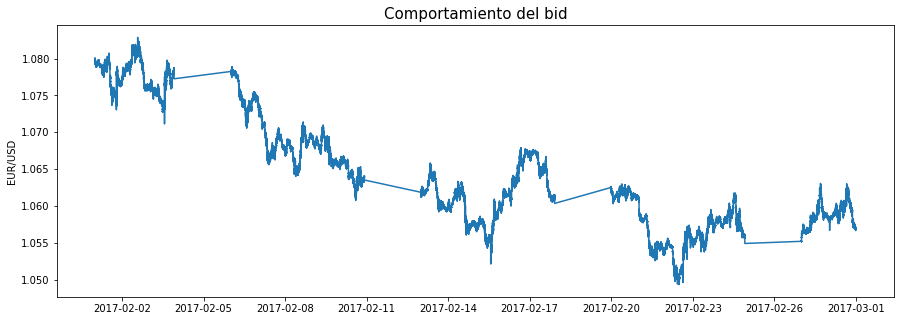

In [34]:
plt.figure(figsize=(15,5))
plt.title('Comportamiento del bid',size=15)
plt.ylabel('EUR/USD')
plt.plot(data_set.index, data_set.bid);

In [35]:
%run ../code/build_dataset.py
%run ../code/PNLEstimatorWrapper.py
%run ../code/redim.py
%run ../code/step_validation.py
%run ../code/v_split.py

In [36]:
window = 7
X, y_reg, bt = build_dataset(data_set, window, binary_target=True, delete_constant_values=True, PNL=True)

KeyboardInterrupt: 

In [ ]:
print('tamaño de los datos= ',X.shape)
print()
print('          probabilidades con 20s          ')
print('------------------------------------------')
print('# veces que baja lo suficiente para ganar = ',sum(bt==0),' | ', np.mean(bt==0),'%')
print('# veces que baja pero pierdo = ',sum(bt==2),' | ', np.mean(bt==2),'%')
print('--------------------------------------------')
print('# veces que sube lo suficiente para ganar = ',sum(bt==1),' | ', np.mean(bt==1),'%')
print('# veces que sube pero pierdo = ',sum(bt==3),' | ', np.mean(bt==3),'%')
print('--------------------------------------------')
print('probabilidad de ganar = ', (np.mean(bt==0)+np.mean(bt==1))*100)
print('probabilidad de perder = ', (np.mean(bt==2)+np.mean(bt==3))*100)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
    
y = bt
n_bdtrain = 4
n_bdtest = 1
mday = 1
#para indexar el dataframe por las fechas
dates = np.unique(X.index.date)[n_bdtrain:]
est_GNB = PNLEstimatorWrapper(GaussianNB(), PNL_column=['PNL_0','PNL_1'])
result_GNB = step_validation(est_GNB, X, y, v_split(X,n_bdtrain,n_bdtest,mday))
result_GNB, predict_GNB = redim(result_GNB)

est_KNC = PNLEstimatorWrapper(KNeighborsClassifier(n_neighbors=7,n_jobs=2,leaf_size=30
                                                   ,algorithm='kd_tree'), PNL_column=['PNL_0','PNL_1'])
result_KNC = step_validation(est_KNC, X, y, v_split(X,n_bdtrain,n_bdtest,mday))
result_KNC, predict_KNC = redim(result_KNC)

est_DTC = PNLEstimatorWrapper(DecisionTreeClassifier(), PNL_column=['PNL_0','PNL_1'])
result_DTC = step_validation(est_DTC, X, y, v_split(X,n_bdtrain,n_bdtest,mday))
result_DTC, predict_DTC = redim(result_DTC)

est_RFC = PNLEstimatorWrapper(RandomForestClassifier(n_estimators=15, n_jobs=3), PNL_column=['PNL_0','PNL_1'])
result_RFC = step_validation(est_RFC, X, y, v_split(X,n_bdtrain,n_bdtest,mday))
result_RFC, predict_RFC = redim(result_RFC)
print('-------------------------------------')
print('--- Resultados de muestreo de 20s ---')
print('-------------------------------------')
print('--------- GaussianNB ----------------')
print('average PNL : ', np.mean(result_GNB[:,0]))
print('average buy: ', np.mean(result_GNB[:,1]))
print('average sell: ', np.mean(result_GNB[:,2]))
print('% correct: ', np.mean(result_GNB[:,5]))
print()
print('--------- KNeighbors ----------------')
print('average PNL : ', np.mean(result_KNC[:,0]))
print('average buy: ', np.mean(result_KNC[:,1]))
print('average sell: ', np.mean(result_KNC[:,2]))
print('% correct: ', np.mean(result_KNC[:,5]))
print()
print('--------- DecisionTree ----------------')
print('average PNL : ', np.mean(result_DTC[:,0]))
print('average buy: ', np.mean(result_DTC[:,1]))
print('average sell: ', np.mean(result_DTC[:,2]))
print('% correct: ', np.mean(result_DTC[:,5]))
print()
print('--------- RandomForest ----------------')
print('average PNL : ', np.mean(result_RFC[:,0]))
print('average buy: ', np.mean(result_RFC[:,1]))
print('average sell: ', np.mean(result_RFC[:,2]))
print('% correct: ', np.mean(result_RFC[:,5]))
print('-------------------------------------')

In [27]:
#Se lee la señal anteriormente procesada
data_set = pd.read_csv("../data/TrueFX/EUR-USD/datos_procesados_5T_EURUSD-2017-02.csv", parse_dates=True,
                      infer_datetime_format=True, index_col=0)

In [30]:
window = 7
X, y_reg, bt = build_dataset(data_set, window, binary_target=True, delete_constant_values=True, PNL=True)

In [32]:
print('tamaño de los datos= ',X.shape)
print()
print('          probabilidades con 5min          ')
print('------------------------------------------')
print('# veces que baja lo suficiente para ganar = ',sum(bt==0),' | ', np.mean(bt==0),'%')
print('# veces que baja pero pierdo = ',sum(bt==2),' | ', np.mean(bt==2),'%')
print('--------------------------------------------')
print('# veces que sube lo suficiente para ganar = ',sum(bt==1),' | ', np.mean(bt==1),'%')
print('# veces que sube pero pierdo = ',sum(bt==3),' | ', np.mean(bt==3),'%')
print('--------------------------------------------')
print('probabilidad de ganar = ', (np.mean(bt==0)+np.mean(bt==1))*100)
print('probabilidad de perder = ', (np.mean(bt==2)+np.mean(bt==3))*100)

tamaño de los datos=  (6232, 9)

          probabilidades con 5min          
------------------------------------------
# veces que baja lo suficiente para ganar =  2686  |  0.431001283697 %
# veces que baja pero pierdo =  400  |  0.0641848523748 %
--------------------------------------------
# veces que sube lo suficiente para ganar =  2742  |  0.43998716303 %
# veces que sube pero pierdo =  404  |  0.0648267008986 %
--------------------------------------------
probabilidad de ganar =  87.0988446727
probabilidad de perder =  12.9011553273
